In [8]:
# import Libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [2]:
df = pd.read_csv("learn_prophet.csv")

In [3]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
df['cap'] = 8.5

In [5]:
df.head()

,ds,y,cap
0,2007-12-10,9.590761,8.5
1,2007-12-11,8.519590,8.5
2,2007-12-12,8.183677,8.5
3,2007-12-13,8.072467,8.5
4,2007-12-14,7.893572,8.5


In [6]:
m = Prophet(growth='logistic')
m.fit(df)

14:50:20 - cmdstanpy - INFO - Chain [1] start processing
14:50:21 - cmdstanpy - INFO - Chain [1] done processing


e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


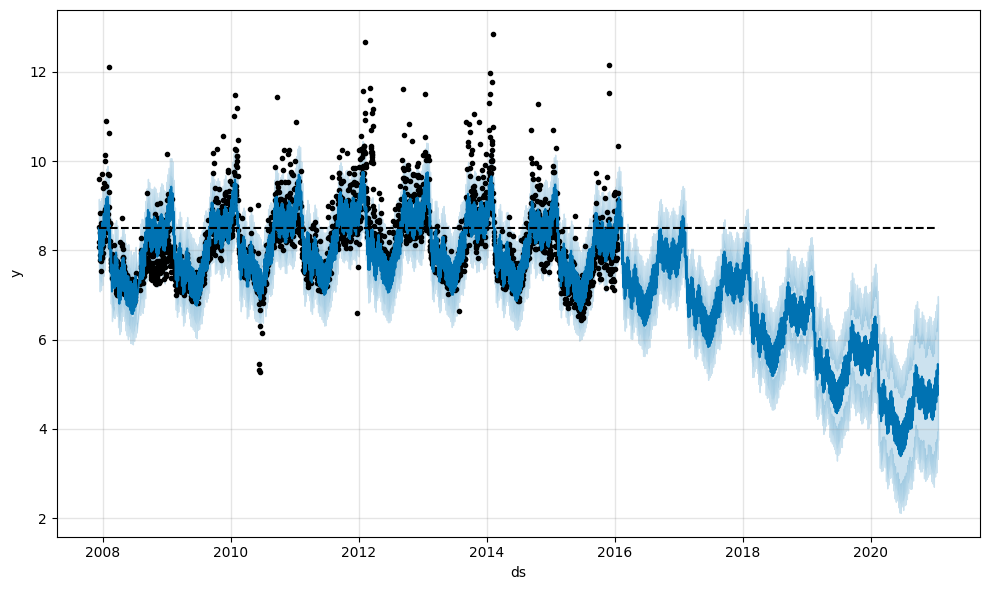

In [9]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

In [10]:
future.head()

,ds,cap
0,2007-12-10,8.5
1,2007-12-11,8.5
2,2007-12-12,8.5
3,2007-12-13,8.5
4,2007-12-14,8.5


In [11]:
fcst.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,7.684320,8.5,7.792957,9.152469,7.684320,7.684320,0.808143,0.808143,0.808143,0.351885,0.351885,0.351885,0.456258,0.456258,0.456258,0.0,0.0,0.0,8.492463
1,2007-12-11,7.685029,8.5,7.553379,8.912528,7.685029,7.685029,0.562194,0.562194,0.562194,0.121197,0.121197,0.121197,0.440998,0.440998,0.440998,0.0,0.0,0.0,8.247223
2,2007-12-12,7.685736,8.5,7.356486,8.737100,7.685736,7.685736,0.361413,0.361413,0.361413,-0.065151,-0.065151,-0.065151,0.426565,0.426565,0.426565,0.0,0.0,0.0,8.047150
3,2007-12-13,7.686444,8.5,7.355193,8.702326,7.686444,7.686444,0.340710,0.340710,0.340710,-0.072671,-0.072671,-0.072671,0.413381,0.413381,0.413381,0.0,0.0,0.0,8.027154
4,2007-12-14,7.687151,8.5,7.327613,8.672241,7.687151,7.687151,0.332180,0.332180,0.332180,-0.069651,-0.069651,-0.069651,0.401831,0.401831,0.401831,0.0,0.0,0.0,8.019331


14:59:21 - cmdstanpy - INFO - Chain [1] start processing
14:59:21 - cmdstanpy - INFO - Chain [1] done processing
e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


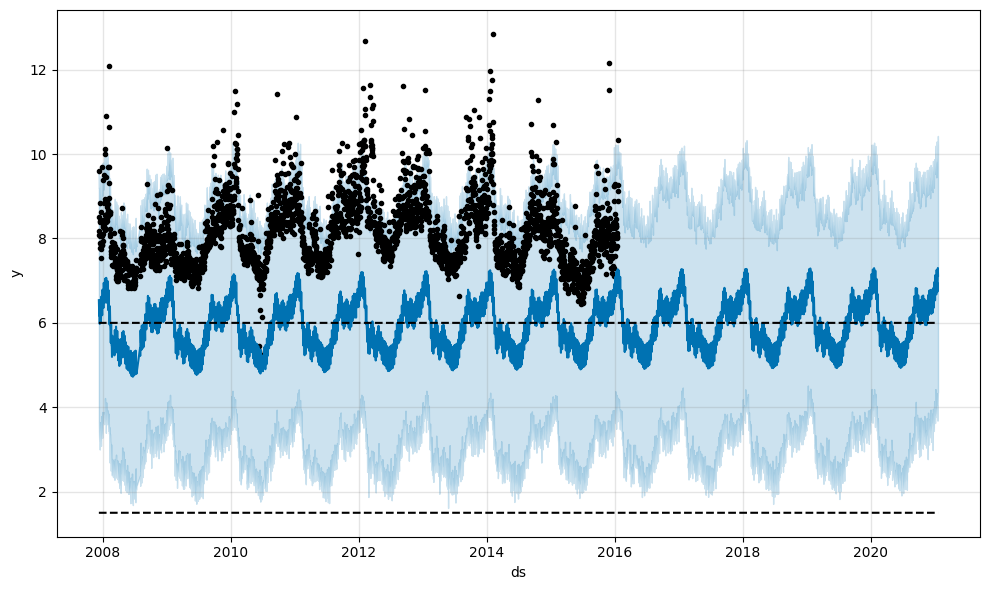

In [16]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic',changepoint_prior_scale=0.001)
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

In [13]:
df.columns

Index(['ds', 'y', 'cap', 'floor'], dtype='object')